In [113]:
using UniversalDiffEq

In [114]:
using DataFrames, CSV
dat = CSV.read("../data/processed_time_series_wide.csv", DataFrame)[:,2:end]
rename!(dat, ["time","juv_1","adult_1","juv_2","adult_2","juv_3","adult_3",
             "juv_4","adult_4","juv_5","adult_5","juv_6","adult_6"])

X = CSV.read("../data/covars_wide.csv", DataFrame)[:,2:end]
rename!(X, ["time", "urchins_1", "urchins_2", "urchins_3", "urchins_4", "urchins_5", "urchins_6"])
X[1:4,:]

4×7 DataFrame
 Row │ time   urchins_1  urchins_2  urchins_3  urchins_4  urchins_5  urchins_6 ⋯
     │ Int64  Float64    Float64    Float64    Float64    Float64    Float64   ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │     1  -0.458772  -0.108205  -0.692056  -0.694647  -0.540091  -0.181015 ⋯
   2 │     2  -0.47913   -0.334408  -0.323902  -0.190702  -0.430227  -0.027116
   3 │     3  -0.910355  -0.548378  -0.346622  -0.456952  -0.84222    0.055374
   4 │     4  -0.509898  -0.36221   -0.338962  -0.647063  -0.666686  -0.391221
                                                                1 column omitted

In [115]:
dat[1:4,:]

4×13 DataFrame
 Row │ time   juv_1      adult_1    juv_2       adult_2    juv_3     adult_3   ⋯
     │ Int64  Float64    Float64    Float64     Float64    Float64   Float64   ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │     1  -1.0498    -0.197155  -0.0421156  -0.394327  0.377395   0.211176 ⋯
   2 │     2   1.13968   -0.513687   1.53107    -1.03003   1.23051   -0.289929
   3 │     3   0.892856   0.959151   1.43465     0.914054  0.85033    0.155549
   4 │     4   0.268149   0.719196   1.04789     0.789329  1.03733    0.540357
                                                               6 columns omitted

In [166]:
using  Random

# No covariates

NN, NNparameters = UniversalDiffEq.SimpleNeuralNetwork(2+1,2,hidden = 5)



function derivs!(du,u,X,p,t)
    # unpack states
    adults = u[2:2:end]
    for i in 1:6
        inds_u = (2*(i-1)+1):(2*(i-1)+2)
        input = vcat(u[inds_u], X[i])
        du[inds_u] .= NN(input,p.NN)
        du[inds_u[1]] += sum(abs.(p.C[i,:]) .* adults[vcat((1:(i-1)), ((i+1):end))]) .+ p.F[i]
    end 
    return  du
end

init_parameters = (NN = NNparameters, C = zeros(6,5), F = zeros(6))

model_1 = UniversalDiffEq.CustomDerivatives(dat,X,derivs!,init_parameters;time_column_name = "time")
nothing



In [118]:
train!(model_1, optim_options = (maxiter = 100,step_size = 0.05) , loss_function = "conditional likelihood")

38261.516 29912.638 25439.331 23754.714 22587.267 21452.974 20398.14 19444.958 18536.506 17630.033 16715.985 15826.15 15002.62 14268.333 13626.563 13063.327 12552.685 12078.034 11640.617 11253.529 10909.727 10601.052 10330.007 10073.544 9835.728 9609.439 9381.209 9169.61 8980.06 8801.668 8637.166 8484.862 8354.215 8237.79 8132.202 8021.845 7923.284 7835.063 7750.266 7677.177 7612.622 7531.941 7457.119 7390.996 7331.075 7290.818 7241.854 7180.752 7135.699 7097.164 7058.404 7011.102 6961.156 6921.382 6886.44 6848.142 6806.201 6767.03 6729.222 6687.501 6647.694 6615.28 6578.056 6540.934 6507.464 6470.545 6434.399 6403.436 6368.689 6333.928 6302.482 6268.404 6236.839 6207.317 6176.195 6146.595 6114.383 6087.349 6057.804 6029.504 6000.888 5970.154 5944.717 5917.82 5890.876 5863.253 5836.737 5811.195 5789.345 5766.639 5748.774 5774.034 5938.409 6232.458 5772.048 6072.955 5782.372 5980.832 5780.6 5941.733 5748.774 

In [175]:
train!(model_1, optim_options = (maxiter = 100,step_size = 0.01) , loss_function = "conditional likelihood")
#train!(model_1, optim_options = (maxiter = 100,step_size = 0.01) , loss_function = "derivative matching")

38261.516 35817.428 33636.865 31805.983 30298.171 29077.849 28074.023 27229.459 26510.478 25889.593 25345.455 24862.259 24428.073 24033.108 23669.055 23328.598 23006.174 22697.653 22400.21 22111.756 21830.622 21555.193 21284.139 21016.607 20752.224 20490.9 20232.669 19977.554 19725.592 19478.686 19235.702 18996.193 18760.702 18529.493 18302.69 18080.379 17862.607 17649.453 17441.01 17237.778 17039.421 16846.987 16659.203 16475.899 16297.084 16123.455 15954.628 15789.291 15627.553 15469.609 15314.793 15163.203 15015.408 14870.538 14728.704 14589.313 14452.541 14318.449 14186.825 14057.864 13931.416 13807.446 13686.044 13566.949 13450.051 13335.17 13222.323 13111.474 13003.022 12896.565 12792.395 12690.489 12590.096 12491.31 12395.058 12300.626 12207.21 12115.149 12025.191 11937.385 11850.737 11765.813 11682.426 11600.348 11519.827 11440.6 11363.305 11287.259 11212.605 11139.075 11067.691 10996.872 10928.331 10860.782 10794.299 10728.582 10664.242 10601.012 10538.487 10477.798 10477.798 

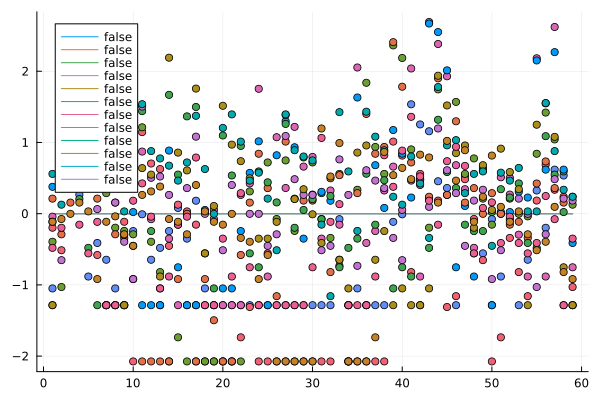

In [168]:
using Plots
Plots.plot(model_1.parameters.uhat',  label = "false")
Plots.scatter!(model_1.data', label = false)

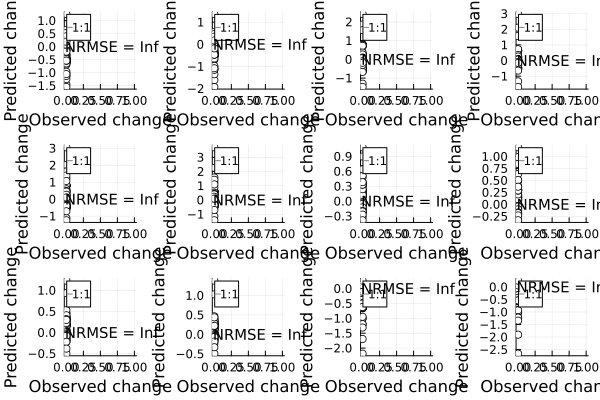

In [169]:
plot_predictions(model_1)

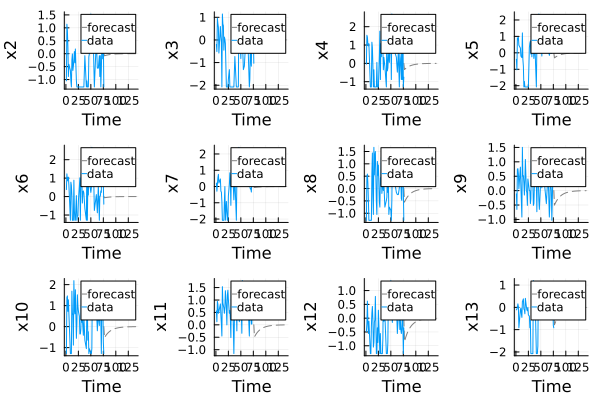

In [170]:
plt,plts = plot_forecast(model_1, 50)
plt

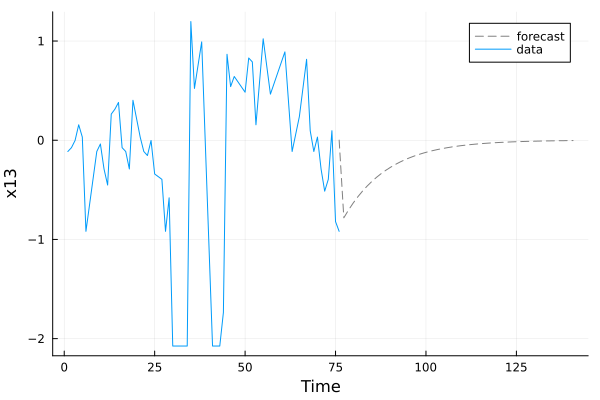

In [171]:
plts[12]

In [172]:
abs.(model_1.parameters.process_model.C)

6×5 Matrix{Float64}:
 0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0

In [173]:
abs.(model_1.parameters.process_model.C)[1:6]

6-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

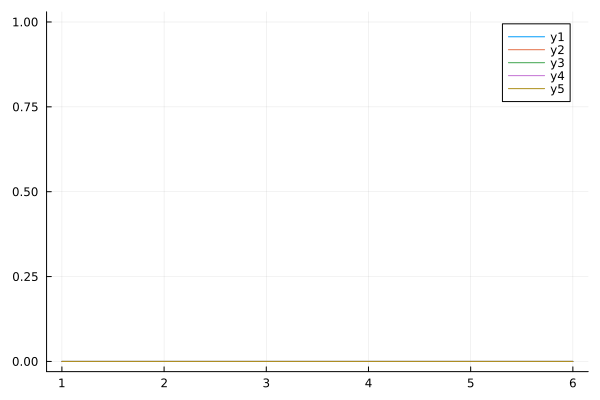

In [174]:
Plots.plot(abs.(model_1.parameters.process_model.C))


In [ ]:
rhs(zeros(12))

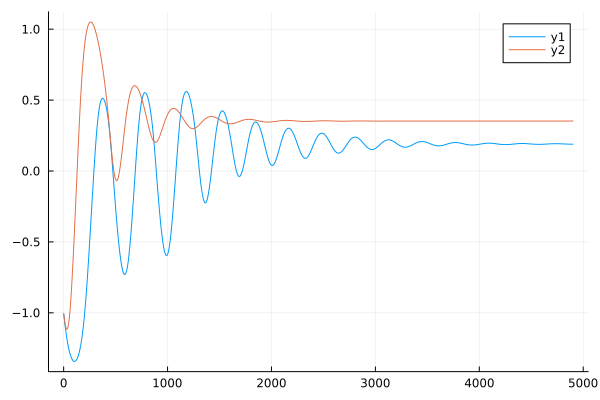

In [165]:
site = 1
pyc = 1.0
rug = 1.0
with_noise = false
sigma = 0.5
u = zeros(12) .- 1
x = zeros(6) .+ 0.45
rhs = u -> model_1.process_model.right_hand_side(u,x,model_1.parameters.process_model, 0)

dt = 0.01
kelp = []
j_kelp = []
for i in 1:dt:50
    u = u .+ dt*rhs(u)
    push!(kelp,u[12])
    push!(j_kelp,u[10])
end
Plots.plot(kelp)
Plots.plot!(j_kelp)




In [ ]:
using  Random

# No covariates

NN_2, NNparameters_2 = UniversalDiffEq.SimpleNeuralNetwork(18,12,hidden = 5)

function derivs!(du,u,X,p,t)
    # unpack states
    du .= NN(vcat(u,X),p.NN)
    return  du
end

init_parameters = (NN = NNparameters_2,)

model_2 = UniversalDiffEq.CustomDerivatives(dat,X,derivs!,init_parameters;time_column_name = "time")
nothing

In [87]:
train!(model_2, optim_options = (maxiter = 150,step_size = 0.05) , loss_function = "conditional likelihood")

25875.823 24199.538 22747.556 20947.764 19550.839 18402.413 17391.361 16453.529 15574.715 14766.154 14031.764 13359.557 12731.668 12137.122 11578.813 11062.628 10577.439 10114.538 9683.573 9285.745 8908.484 8549.614 8210.368 7911.765 7642.302 7375.04 7123.912 6938.665 6765.95 6622.827 6287.227 6223.823 6301.792 5985.249 6036.679 5722.413 5691.343 5482.112 5536.649 5343.891 5324.923 5146.534 5184.783 5040.183 5037.926 4879.784 4911.499 4789.71 4776.242 4674.526 4630.158 4618.899 4512.661 4593.897 4569.77 4463.108 4495.992 4369.4 4342.453 4299.375 4274.25 4221.193 4200.077 4151.993 4124.311 4110.201 4035.761 4040.768 4021.316 3964.84 3986.626 3979.938 3956.432 3992.499 3952.871 3919.618 3844.342 3775.405 3824.544 3778.18 3763.293 3726.752 3689.217 3688.2 3670.882 3644.005 3655.514 3697.969 3671.797 3785.729 3843.429 3590.161 3764.105 3638.199 3595.006 3637.504 3552.536 3583.303 3521.422 3515.313 3543.978 3472.815 3499.472 3446.333 3453.218 3399.82 3388.99 3385.688 3364.706 3348.598 3326.

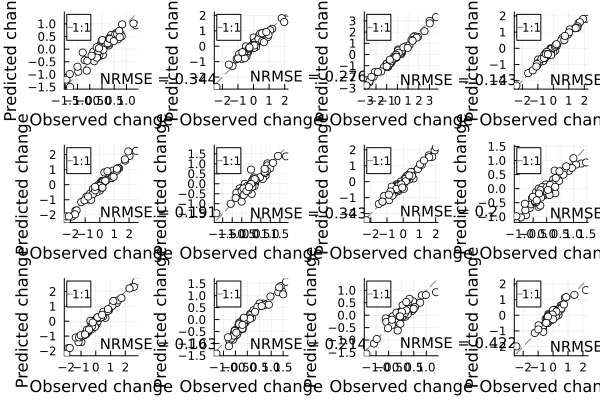

In [89]:
plot_predictions(model_2)

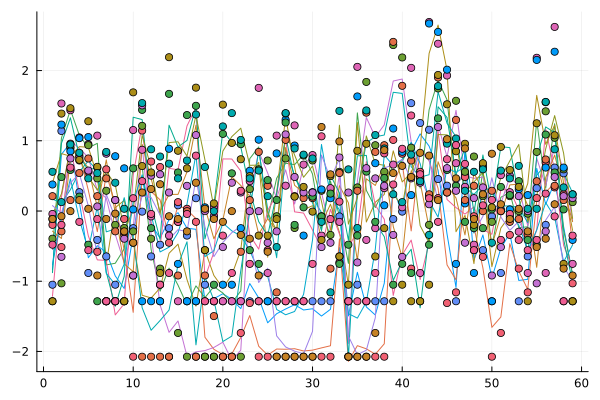

In [92]:
using Plots
Plots.plot(model_1.parameters.uhat', label = false)
Plots.scatter!(model_1.data', label = false)

In [ ]:
plt,plts = plot_forecast(model_2, 20)


(Plot{Plots.GRBackend() n=24}, Any[Plot{Plots.GRBackend() n=2}, Plot{Plots.GRBackend() n=2}, Plot{Plots.GRBackend() n=2}, Plot{Plots.GRBackend() n=2}, Plot{Plots.GRBackend() n=2}, Plot{Plots.GRBackend() n=2}, Plot{Plots.GRBackend() n=2}, Plot{Plots.GRBackend() n=2}, Plot{Plots.GRBackend() n=2}, Plot{Plots.GRBackend() n=2}, Plot{Plots.GRBackend() n=2}, Plot{Plots.GRBackend() n=2}])

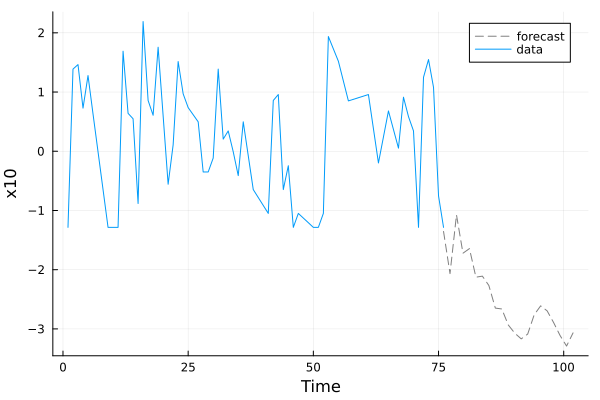

In [104]:
plts[9]